In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('Advertising.csv')

# Display the first few rows
data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


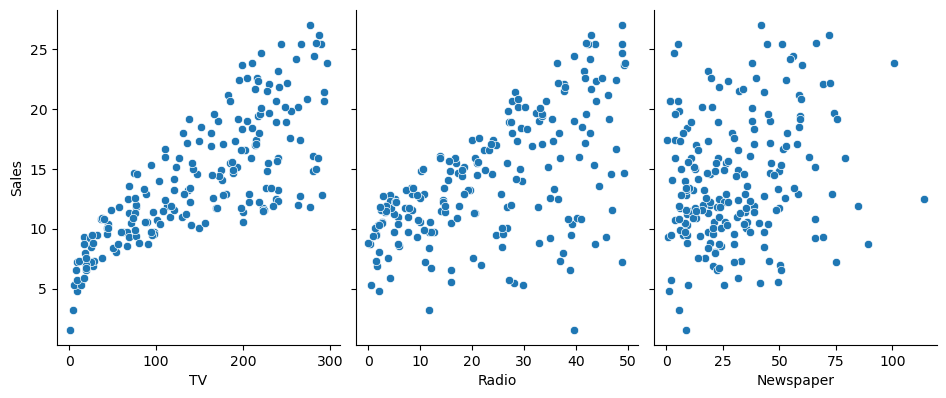

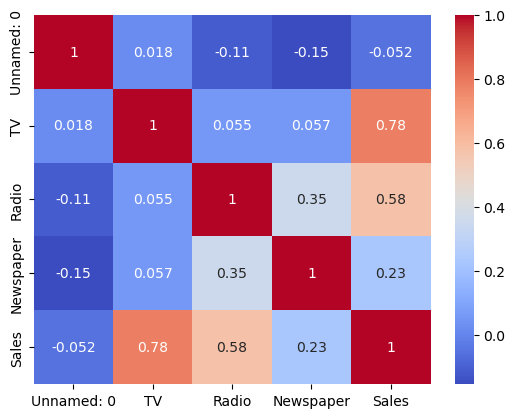

In [4]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Visualize relationships between features and sales
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.8)
plt.show()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [6]:
# Define features (X) and target (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (160, 3)
Testing set size: (40, 3)


In [8]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629


Mean Squared Error: 3.1740973539761046
R-squared: 0.899438024100912


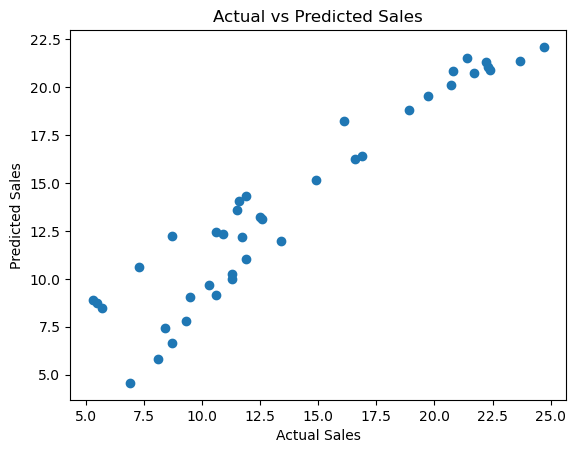

In [10]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [12]:
# Example: Predict sales for a new advertising budget
new_data = pd.DataFrame({
    'TV': [100],
    'Radio': [50],
    'Newspaper': [20]
})
predicted_sales = model.predict(new_data)
print(f"Predicted Sales: {predicted_sales[0]}")


Predicted Sales: 16.966994083540435
